# Thực hiện quá trình dự báo trên mô hình ARIMA

## Thêm thư viện

In [1]:
import pandas as pd
import warnings
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from pmdarima.arima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')


## Nạp dữ liệu từ file csv

In [2]:
df_train = pd.read_csv("../../../Dataset/bitcoin_train_7_3.csv", parse_dates=True,
                       index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_train.index

df_close_train = df_train['Open'].values.copy().reshape(-1, 1)
df_train.head()


,Open
Date,
2020-06-01,9.4545
2020-06-02,10.1907
2020-06-03,9.5270
2020-06-04,9.6672
2020-06-05,9.7940


In [3]:
df_test = pd.read_csv("../../../Dataset/bitcoin_test_7_3.csv", parse_dates=True,
                      index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_test.index

df_close_test = df_test['Open'].values.copy().reshape(-1, 1)
df_test.head()


,Open
Date,
2021-10-26,63.0675
2021-10-27,60.3125
2021-10-28,58.4372
2021-10-29,60.5799
2021-10-30,62.2450


# Vẽ đồ thị

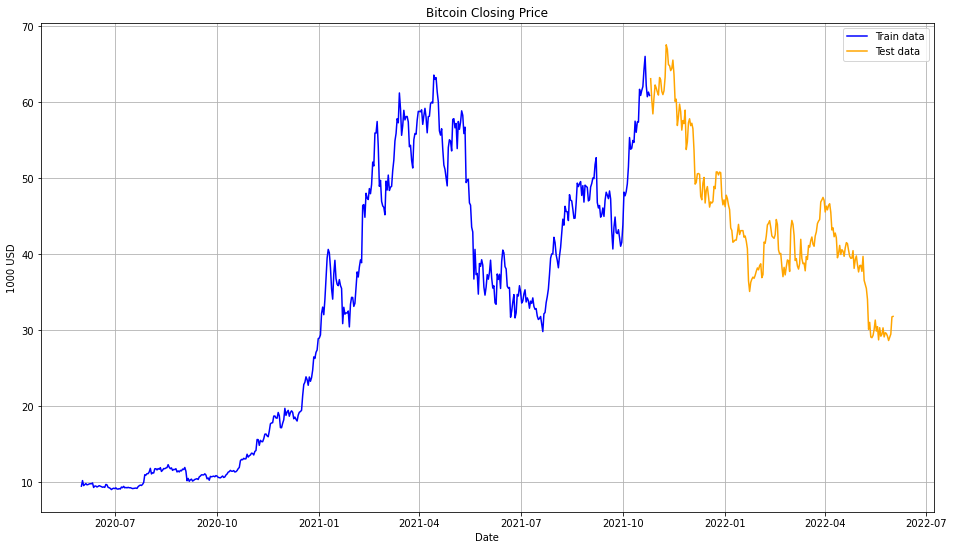

In [4]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Bitcoin Closing Price")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_train['Open'], 'blue', label='Train data')
plt.plot(df_test['Open'], 'orange', label='Test data')
plt.legend()


In [5]:
train_data, test_data = df_train, df_test
index_test = column_or_1d(df_test.index)
print(train_data.shape)
print(test_data.shape)


(512, 1)
(219, 1)


In [6]:
train_data

,Open
Date,
2020-06-01,9.4545
2020-06-02,10.1907
2020-06-03,9.5270
2020-06-04,9.6672
2020-06-05,9.7940
...,...
2021-10-21,66.0046
2021-10-22,62.2008
2021-10-23,60.6932


<h1>Xây dựng mô hình ARIMA để dự đoán giá Bitcoin theo chuỗi thời gian


In [7]:
warnings.filterwarnings('ignore')


def arima_model(ts_data):
    fit_model = auto_arima(ts_data, test='adf', seasonal=False, trace=True)
    return fit_model


In [8]:
fitted = arima_model(train_data)
fitted.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1872.518, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1872.712, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1872.837, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1872.794, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1874.325, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.982 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  512
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -934.259
Date:                Sun, 26 Jun 2022   AIC                           1872.518
Time:                        15:01:05   BIC                           1880.991
Sample:                             0   HQIC                          1875.840
                                - 512                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1006      0.067      1.509      0.131      -0.030       0.231
sigma2         2.2676      0.082     27.761      0.000       2.107       2.428
===================================================================================
Ljung-Box (L1) (Q):                   1.82   Jarque-Bera (JB):               349.53
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):              36.39   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h1> Dự đoán trên tập test

In [9]:
pred = fitted.predict(len(test_data))
pred


array([60.96490626, 61.06551252, 61.16611879, 61.26672505, 61.36733131,
       61.46793757, 61.56854384, 61.6691501 , 61.76975636, 61.87036262,
       61.97096888, 62.07157515, 62.17218141, 62.27278767, 62.37339393,
       62.4740002 , 62.57460646, 62.67521272, 62.77581898, 62.87642524,
       62.97703151, 63.07763777, 63.17824403, 63.27885029, 63.37945656,
       63.48006282, 63.58066908, 63.68127534, 63.7818816 , 63.88248787,
       63.98309413, 64.08370039, 64.18430665, 64.28491292, 64.38551918,
       64.48612544, 64.5867317 , 64.68733796, 64.78794423, 64.88855049,
       64.98915675, 65.08976301, 65.19036928, 65.29097554, 65.3915818 ,
       65.49218806, 65.59279432, 65.69340059, 65.79400685, 65.89461311,
       65.99521937, 66.09582564, 66.1964319 , 66.29703816, 66.39764442,
       66.49825068, 66.59885695, 66.69946321, 66.80006947, 66.90067573,
       67.001282  , 67.10188826, 67.20249452, 67.30310078, 67.40370705,
       67.50431331, 67.60491957, 67.70552583, 67.80613209, 67.90

# Vẽ đồ thị cho tập test và kết quả dự đoán


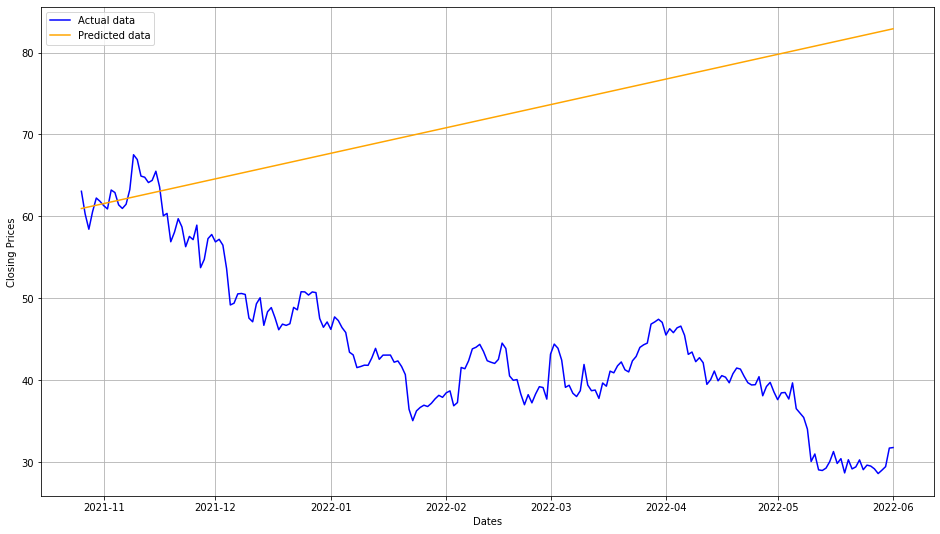

In [10]:
pred_series = pd.Series(pred, index=index_test)

plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_data, 'blue', label='Actual data')
plt.plot(pred_series, 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [11]:
mape = mean_absolute_percentage_error(test_data.values, pred_series.values)
mse = mean_squared_error(test_data.values, pred_series.values)
rmse = np.sqrt(mse)
r2 = r2_score(test_data.values, pred_series.values)

print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2*100:.2f}%")

MAPE: 72.05%
RMSE: 31.41
R2: -1050.66%


# Tạo một DataFrame là 'df_pred' để lưu kết quả dự đoán trên mô hình ARIMA

In [12]:
df_pred = pd.DataFrame(index=index_test)
df_pred['actual'] = test_data.values
df_pred['arima'] = pred_series.values
df_pred['error'] = df_pred['actual'] - df_pred['arima']
df_pred


,actual,arima,error
2021-10-26,63.0675,60.964906,2.102594
2021-10-27,60.3125,61.065513,-0.753013
2021-10-28,58.4372,61.166119,-2.728919
2021-10-29,60.5799,61.266725,-0.686825
2021-10-30,62.2450,61.367331,0.877669
...,...,...,...
2022-05-28,28.6201,82.494646,-53.874546
2022-05-29,29.0271,82.595253,-53.568153
2022-05-30,29.4652,82.695859,-53.230659
2022-05-31,31.7302,82.796465,-51.066265


# Tạo thêm một DataFrame để tiến hành dự đoán sai số trên mô hình SVR

In [13]:
df_svr = df_pred.copy()
df_svr = df_svr.drop(columns=['actual', 'arima'])
timestamp = pd.to_datetime(df_svr.index).astype(np.int64) / 10**9
df_svr['timestamp'] = timestamp
df_svr.tail()

,error,timestamp
2022-05-28,-53.874546,1.653696e+09
2022-05-29,-53.568153,1.653782e+09
2022-05-30,-53.230659,1.653869e+09
2022-05-31,-51.066265,1.653955e+09
2022-06-01,-51.103971,1.654042e+09


In [14]:
svr_x_sc = StandardScaler()
svr_y_sc = StandardScaler()

x = df_svr.iloc[:, -1].values
y = df_svr.iloc[:, 0].values

x_scaled = svr_x_sc.fit_transform(x.reshape(-1, 1))
y_scaled = svr_y_sc.fit_transform(y.reshape(-1, 1))

print(x_scaled.shape)
print(y_scaled.shape)

(219, 1)
(219, 1)


<h1>Vẽ đồ thị thể hiện sai số

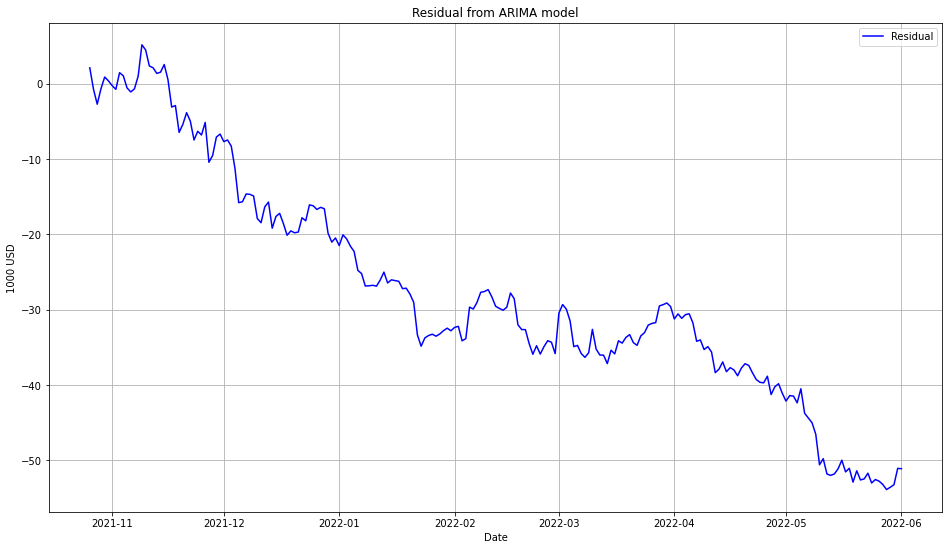

In [15]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Residual from ARIMA model")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_svr['error'], 'blue', label='Residual')
plt.legend()


## Hàm tạo hyperparameters

In [16]:
def para_range(minimum, maximum, step):
    para_list = np.arange(minimum, maximum, step)
    return para_list


def print_stats(hyperparams, stats):
    if(hyperparams[0] == 'poly'):
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}, degree={hyperparams[3]}')
    else:
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}')

    print(
        f"MSE={stats[0] :.2f} | RMSE={stats[1]:.2f}")


In [17]:
kernels = ['sigmoid', 'rbf', 'poly']
Cs = para_range(0.01, 0.2, 0.1)
gammas = para_range(0.1, 5, 0.1)
degrees = para_range(1, 6, 1)


## GridSearch để tìm hyperparameters phù hợp

In [18]:
warnings.filterwarnings('ignore')

stats_df = pd.DataFrame(
    columns=['kernel', 'C', 'gamma', 'degree',  'MSE', 'RMSE'])

# Sử dụng gird-seach để tìm hyperparameters phù hợp
for ker in kernels:
    # Nếu kernel == poly thì thực hiện chọn degree
    if(ker != 'poly'):
        for C in Cs:
            for gamma in gammas:
                rgs = SVR(kernel=ker, C=C, gamma=gamma, verbose=False)
                rgs.fit(x_scaled, y)
                pred = rgs.predict(x_scaled)

                # Đảo tỷ lệ thành giá trị thực
                inv_pred = svr_y_sc.inverse_transform(
                    column_or_1d(pred).reshape(-1, 1))
                inv_y = svr_y_sc.inverse_transform(
                    column_or_1d(y).reshape(-1, 1))

                # Đánh giá mô hình
                mse = mean_squared_error(inv_y, inv_pred)
                rmse = np.sqrt(mse)

                result = {'kernel': ker, 'C': C, 'gamma': gamma,
                          'degree': 0, 'MSE': mse, 'RMSE': rmse}

                hyperparam = [ker, C, gamma, 0]
                stats = [mse, rmse]
                stats_df = stats_df.append(result, ignore_index=True)
                print_stats(hyperparam, stats)
    else:
        for C in Cs:
            for gamma in gammas:
                for deg in degrees:
                    rgs = SVR(kernel=ker, C=C, gamma=gamma,
                              degree=deg, verbose=False)
                    rgs.fit(x_scaled, y)
                    pred = rgs.predict(x_scaled)

                    # Đảo tỷ lệ thành giá trị thực
                    inv_pred = svr_y_sc.inverse_transform(
                        column_or_1d(pred).reshape(-1, 1))
                    inv_y = svr_y_sc.inverse_transform(
                        column_or_1d(y).reshape(-1, 1))

                    # Đánh giá mô hình
                    mse = mean_squared_error(inv_y, inv_pred)
                    rmse = np.sqrt(mse)

                    hyperparam = [ker, C, gamma, deg]
                    stats = [mse, rmse]
                    result = {'kernel': ker, 'C': C, 'gamma': gamma, 'degree': deg,
                              'MSE': mse, 'RMSE': rmse}

                    stats_df = stats_df.append(result, ignore_index=True)

                    print_stats(hyperparam, stats)


SVR(kernel=sigmoid, C=0.01, gamma=0.1
MSE=52277.45 | RMSE=228.64
SVR(kernel=sigmoid, C=0.01, gamma=0.2
MSE=51095.26 | RMSE=226.04
SVR(kernel=sigmoid, C=0.01, gamma=0.30000000000000004
MSE=50032.49 | RMSE=223.68
SVR(kernel=sigmoid, C=0.01, gamma=0.4
MSE=49166.68 | RMSE=221.74
SVR(kernel=sigmoid, C=0.01, gamma=0.5
MSE=48506.11 | RMSE=220.24
SVR(kernel=sigmoid, C=0.01, gamma=0.6
MSE=47972.33 | RMSE=219.03
SVR(kernel=sigmoid, C=0.01, gamma=0.7000000000000001
MSE=47535.73 | RMSE=218.03
SVR(kernel=sigmoid, C=0.01, gamma=0.8
MSE=47167.55 | RMSE=217.18
SVR(kernel=sigmoid, C=0.01, gamma=0.9
MSE=46835.60 | RMSE=216.42
SVR(kernel=sigmoid, C=0.01, gamma=1.0
MSE=46576.49 | RMSE=215.82
SVR(kernel=sigmoid, C=0.01, gamma=1.1
MSE=46412.64 | RMSE=215.44
SVR(kernel=sigmoid, C=0.01, gamma=1.2000000000000002
MSE=46273.16 | RMSE=215.11
SVR(kernel=sigmoid, C=0.01, gamma=1.3000000000000003
MSE=46176.21 | RMSE=214.89
SVR(kernel=sigmoid, C=0.01, gamma=1.4000000000000001
MSE=46023.47 | RMSE=214.53
SVR(kernel=sig

In [19]:
best_fit_model = stats_df[stats_df['RMSE'] == stats_df['RMSE'].min()].head(1)
best_fit_model


,kernel,C,gamma,degree,MSE,RMSE
678,poly,0.11,4.8,3,5659.950467,75.232642


# Xây dựng mô hình SVR với các tham số vừa tìm được

In [20]:
kernel = str(best_fit_model['kernel'].values[0])
C = float(best_fit_model['C'])
gamma = float(best_fit_model['gamma'])
degree = int(best_fit_model['degree'])

if(kernel == 'poly'):
    rgs = SVR(kernel=kernel, C=C, gamma=gamma, degree=degree)
else:
    rgs = SVR(kernel=kernel, C=C, gamma=gamma)

rgs.fit(x_scaled, y_scaled)
pred = rgs.predict(x_scaled)
pred

array([ 2.53444850e+00,  2.46472924e+00,  2.39628920e+00,  2.32911653e+00,
        2.26319939e+00,  2.19852593e+00,  2.13508430e+00,  2.07286267e+00,
        2.01184919e+00,  1.95203201e+00,  1.89339930e+00,  1.83593919e+00,
        1.77963986e+00,  1.72448946e+00,  1.67047613e+00,  1.61758804e+00,
        1.56581334e+00,  1.51514019e+00,  1.46555675e+00,  1.41705116e+00,
        1.36961158e+00,  1.32322617e+00,  1.27788309e+00,  1.23357049e+00,
        1.19027652e+00,  1.14798934e+00,  1.10669711e+00,  1.06638798e+00,
        1.02705011e+00,  9.88671651e-01,  9.51240757e-01,  9.14745587e-01,
        8.79174295e-01,  8.44515037e-01,  8.10755968e-01,  7.77885244e-01,
        7.45891020e-01,  7.14761451e-01,  6.84484693e-01,  6.55048901e-01,
        6.26442231e-01,  5.98652838e-01,  5.71668877e-01,  5.45478505e-01,
        5.20069875e-01,  4.95431144e-01,  4.71550467e-01,  4.48416000e-01,
        4.26015897e-01,  4.04338315e-01,  3.83371408e-01,  3.63103333e-01,
        3.43522244e-01,  

# Vẽ đồ thị

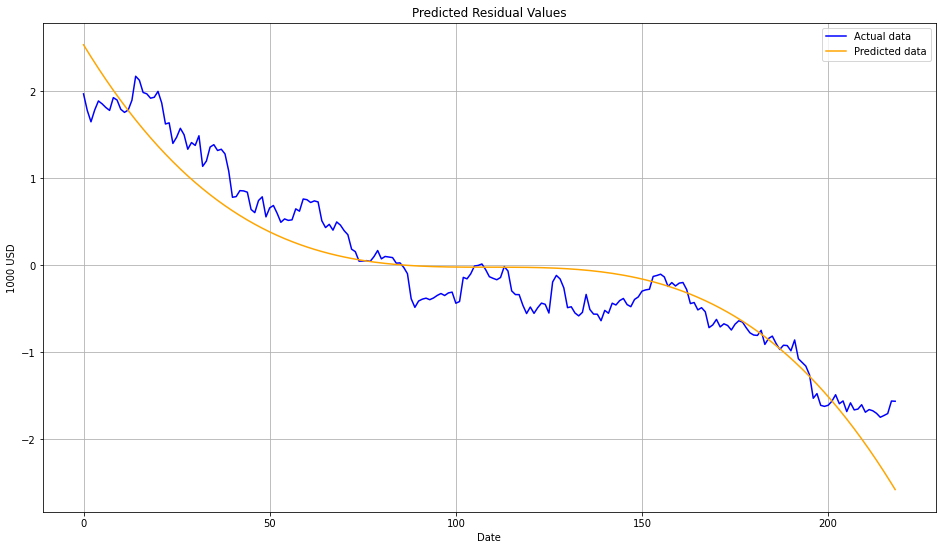

In [21]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Predicted Residual Values")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(column_or_1d(y_scaled), 'blue', label='Actual data')
plt.plot(column_or_1d(pred), 'orange', label='Predicted data')
plt.legend()


# Đưa giá trị về miền giá trị ban đầu

In [22]:
inv_pred = svr_y_sc.inverse_transform(pred.reshape(-1, 1))


In [23]:
df_pred['error_svr'] = inv_pred
df_pred['arima_svr'] = df_pred['arima'] + df_pred['error_svr']
df_pred.tail()

,actual,arima,error,error_svr,arima_svr
2022-05-28,28.6201,82.494646,-53.874546,-62.306058,20.188589
2022-05-29,29.0271,82.595253,-53.568153,-63.298617,19.296636
2022-05-30,29.4652,82.695859,-53.230659,-64.310082,18.385777
2022-05-31,31.7302,82.796465,-51.066265,-65.340630,17.455835
2022-06-01,31.7931,82.897071,-51.103971,-66.390440,16.506631


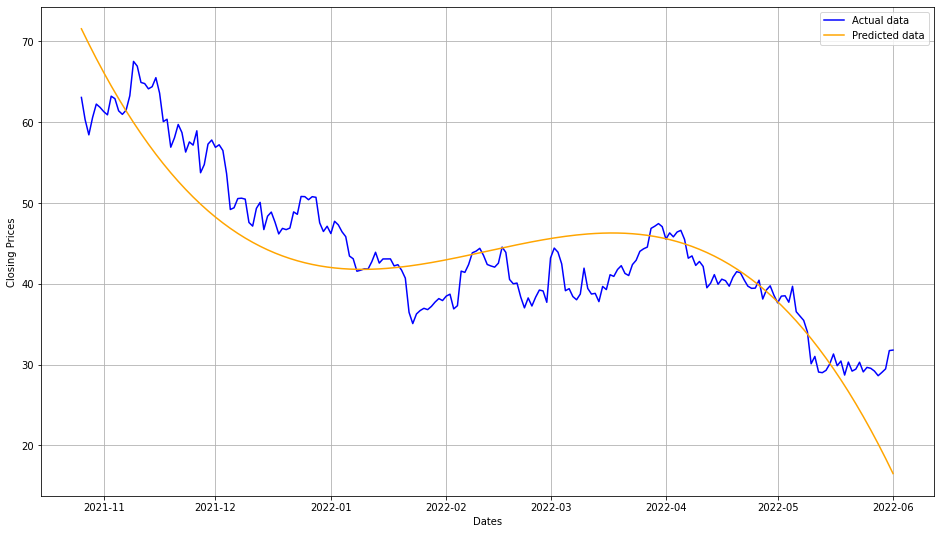

In [24]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_pred['actual'], 'blue', label='Actual data')
plt.plot(df_pred['arima_svr'], 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [25]:
mape = mean_absolute_percentage_error(df_pred['actual'].values, df_pred['arima_svr'].values)
mse = mean_squared_error(df_pred['actual'].values, df_pred['arima_svr'].values)
rmse = np.sqrt(mse)
r2 = r2_score(df_pred['actual'].values, df_pred['arima_svr'].values)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"R-Squared: {r2:.2f}")


RMSE: 5.03
MAPE: 9.44%
R-Squared: 0.70
